In [145]:
SAVE = False
# SAVE = True

In [146]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [147]:
import seaborn.objects as so
from seaborn import axes_style
import pandas as pd
from glob import glob

In [148]:
df = pd.concat([pd.read_csv(f, names=[
    "Number of Nodes",
    "Number of Data Objects",
    "Average Size of Failure Domains",
    "Protocol",
    "Redundancy",
    "Placement Group Size",
    "Step",
    "% of Alive Data",
    "Average Node Failures per Step",
    "Churn Rate",
]) for f in glob("data/saved/*.csv")], ignore_index=True)
df["Average % of Failure Domains"] = df["Average Size of Failure Domains"] / df["Number of Nodes"] * 100
df

,Number of Nodes,Number of Data Objects,Average Size of Failure Domains,Protocol,Redundancy,Placement Group Size,Step,% of Alive Data,Average Node Failures per Step,Churn Rate,Average % of Failure Domains
0,1000,100,10,w/ repair,1.6,8,0,100,NaN,NaN,1.0
1,1000,100,10,w/ repair,1.6,8,7222,99,19.941153,1.994115,1.0
2,1000,100,10,w/ repair,1.6,8,11508,99,19.921534,1.992153,1.0
3,1000,100,10,w/ repair,1.6,8,21375,98,20.003040,2.000304,1.0
4,1000,100,10,w/ repair,1.6,8,23080,98,20.013865,2.001386,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1314,1000,100,5,w/ repair,1.6,8,974969,83,20.723654,2.072365,0.5
1315,1000,100,5,w/ repair,1.6,8,983143,83,20.723331,2.072333,0.5
1316,1000,100,5,w/ repair,1.6,8,991522,83,20.723090,2.072309,0.5
1317,1000,100,5,w/ repair,1.6,8,999727,83,20.724413,2.072441,0.5


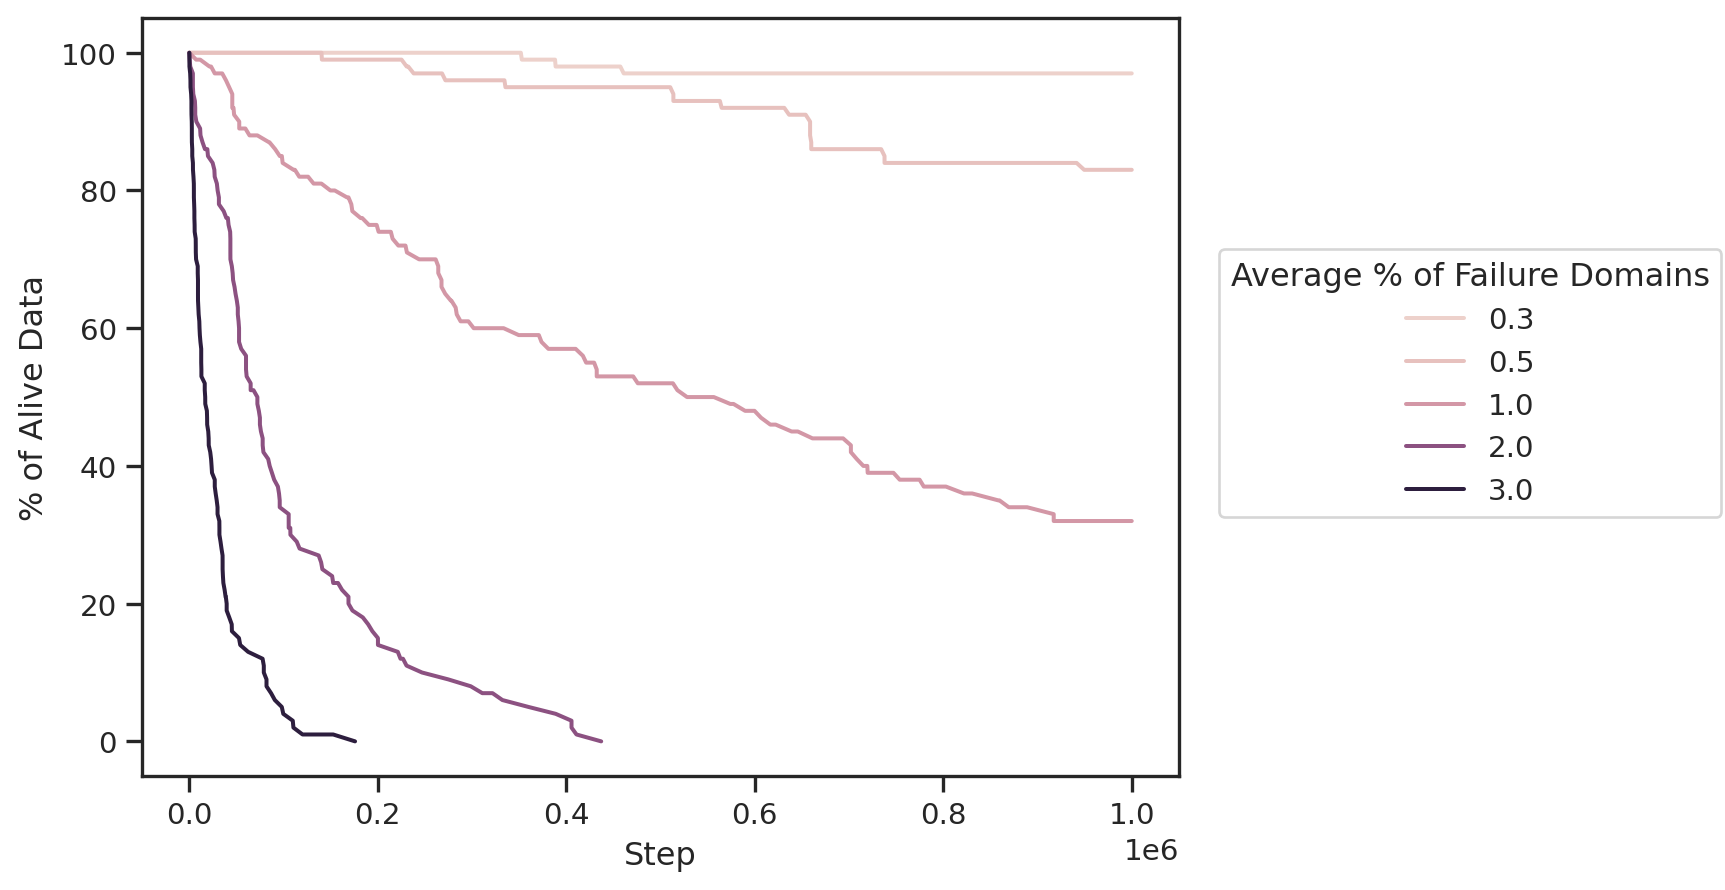

In [149]:
p = (
    so.Plot(
        data=df[(df["Average Size of Failure Domains"] != 0) & (df["Redundancy"] == 1.6) & (df["Placement Group Size"] == 8)], 
        x="Step", y="% of Alive Data", color="Average % of Failure Domains")
    .theme({**axes_style("ticks")})
    .add(so.Line())
    .scale(color=so.Continuous().tick(at=[0.3, 0.5, 1, 2, 3]))
)
p

In [150]:
if SAVE:
    p.save('domain-scale.pdf', bbox_inches='tight')

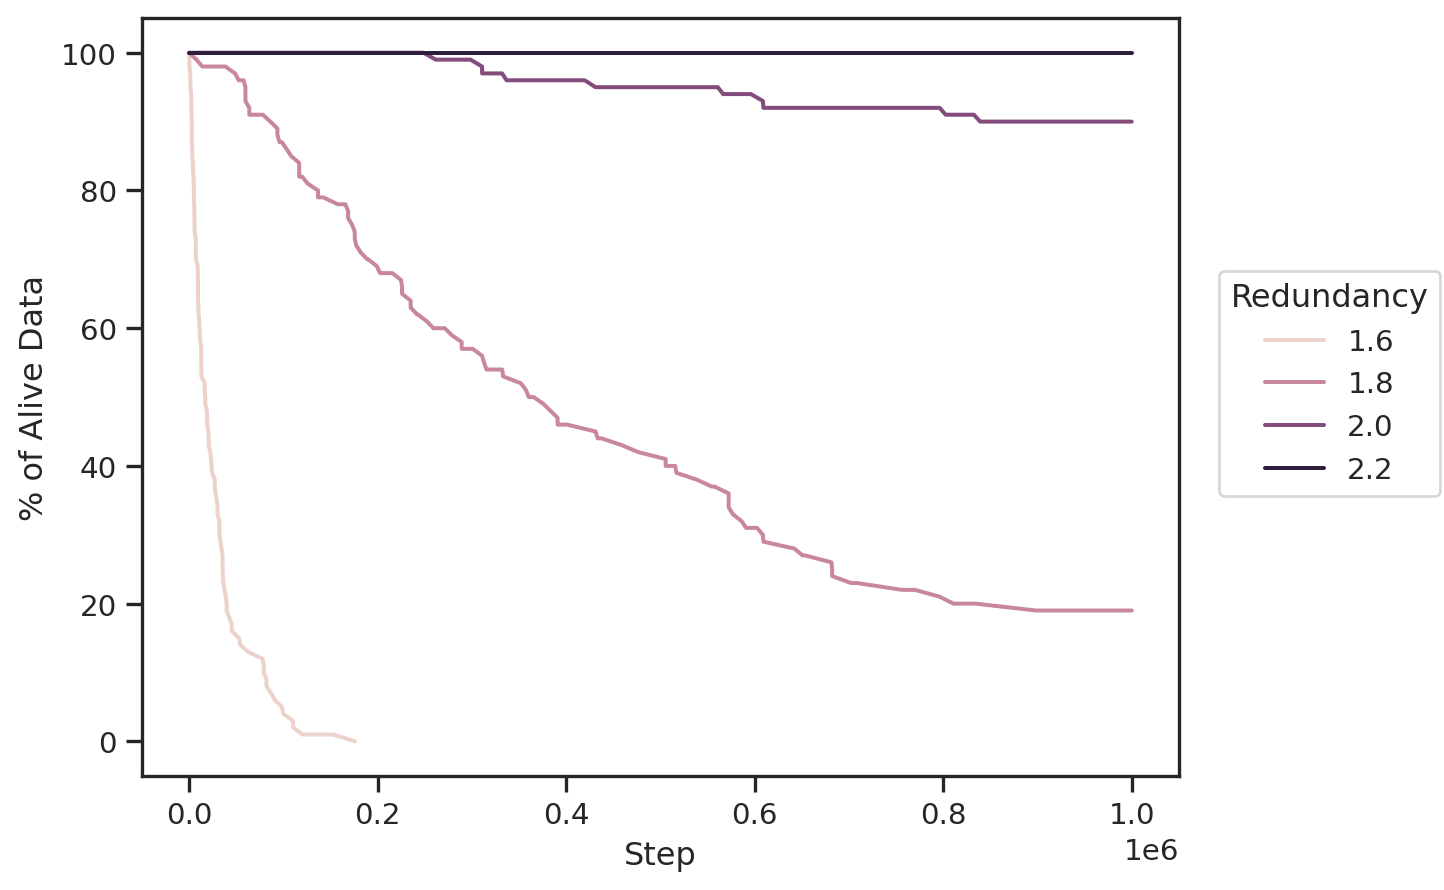

In [151]:
p = (
    so.Plot(
        data=df[(df["Average % of Failure Domains"] == 3) & ((df["Redundancy"] > 1.6) | (df["Placement Group Size"] == 8))], 
        x="Step", y="% of Alive Data", color="Redundancy")
    .theme({**axes_style("ticks")})
    .add(so.Line())
    .scale(color=so.Continuous().tick(at=[x / 5 for x in range(8, 12)]))
)
p

In [152]:
if SAVE:
    p.save('redundancy.pdf', bbox_inches='tight')

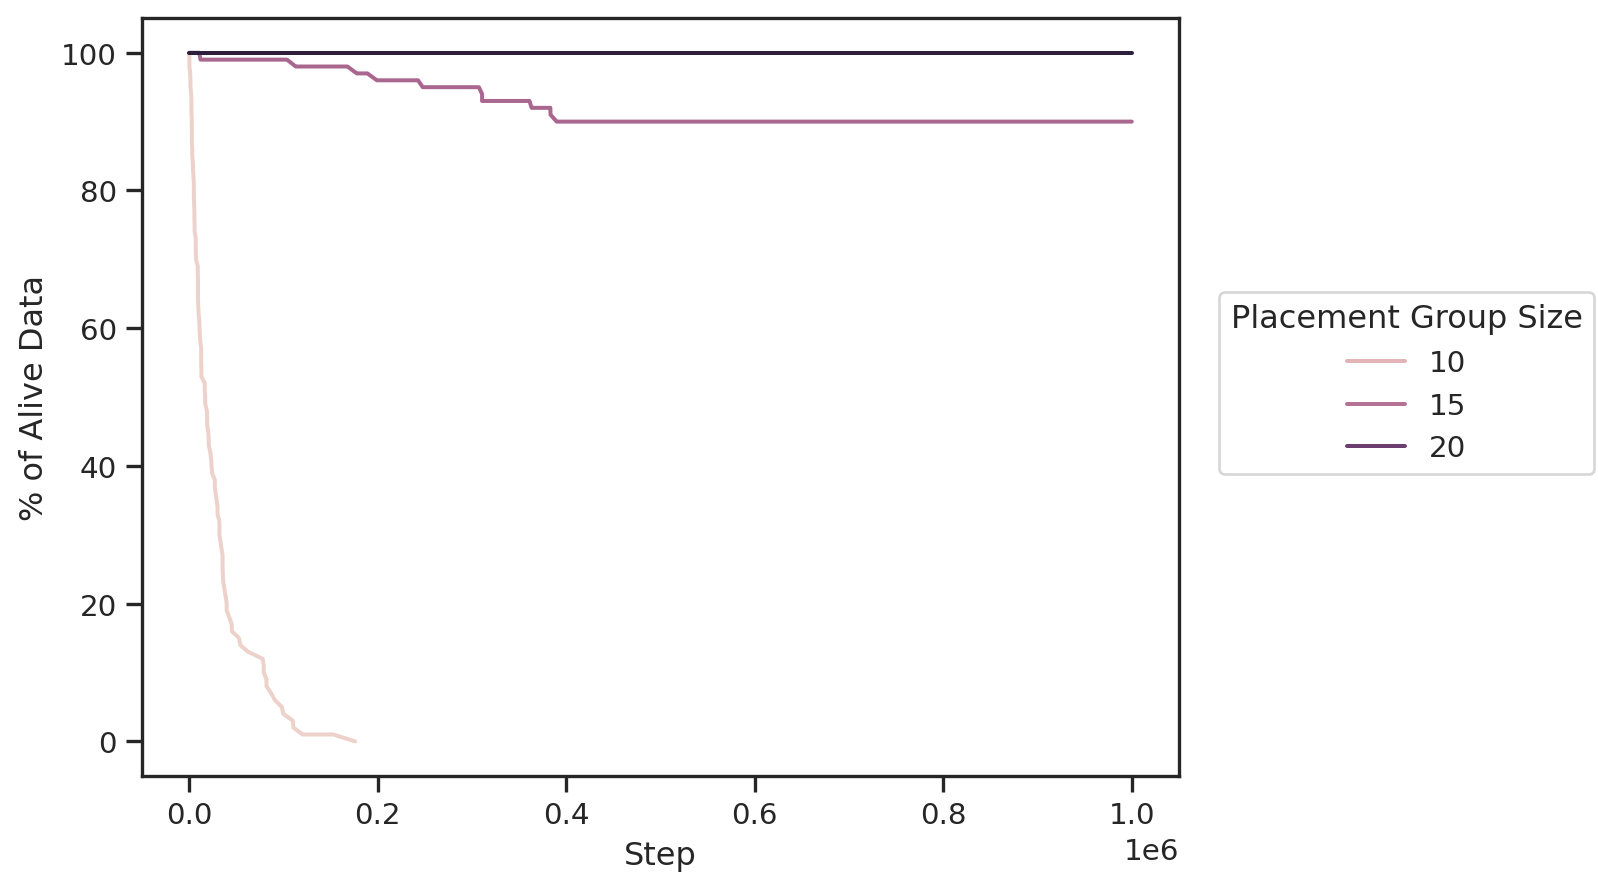

In [153]:
p = (
    so.Plot(
        data=df[(df["Average % of Failure Domains"] == 3) & ((df["Redundancy"] == 1.6))], 
        x="Step", y="% of Alive Data", color="Placement Group Size")
    .theme({**axes_style("ticks")})
    .add(so.Line())
    # .scale(color=so.Continuous().tick(at=[x / 5 for x in range(8, 12)]))
)
p

In [154]:
if SAVE:
    p.save('group-scale.pdf', bbox_inches='tight')

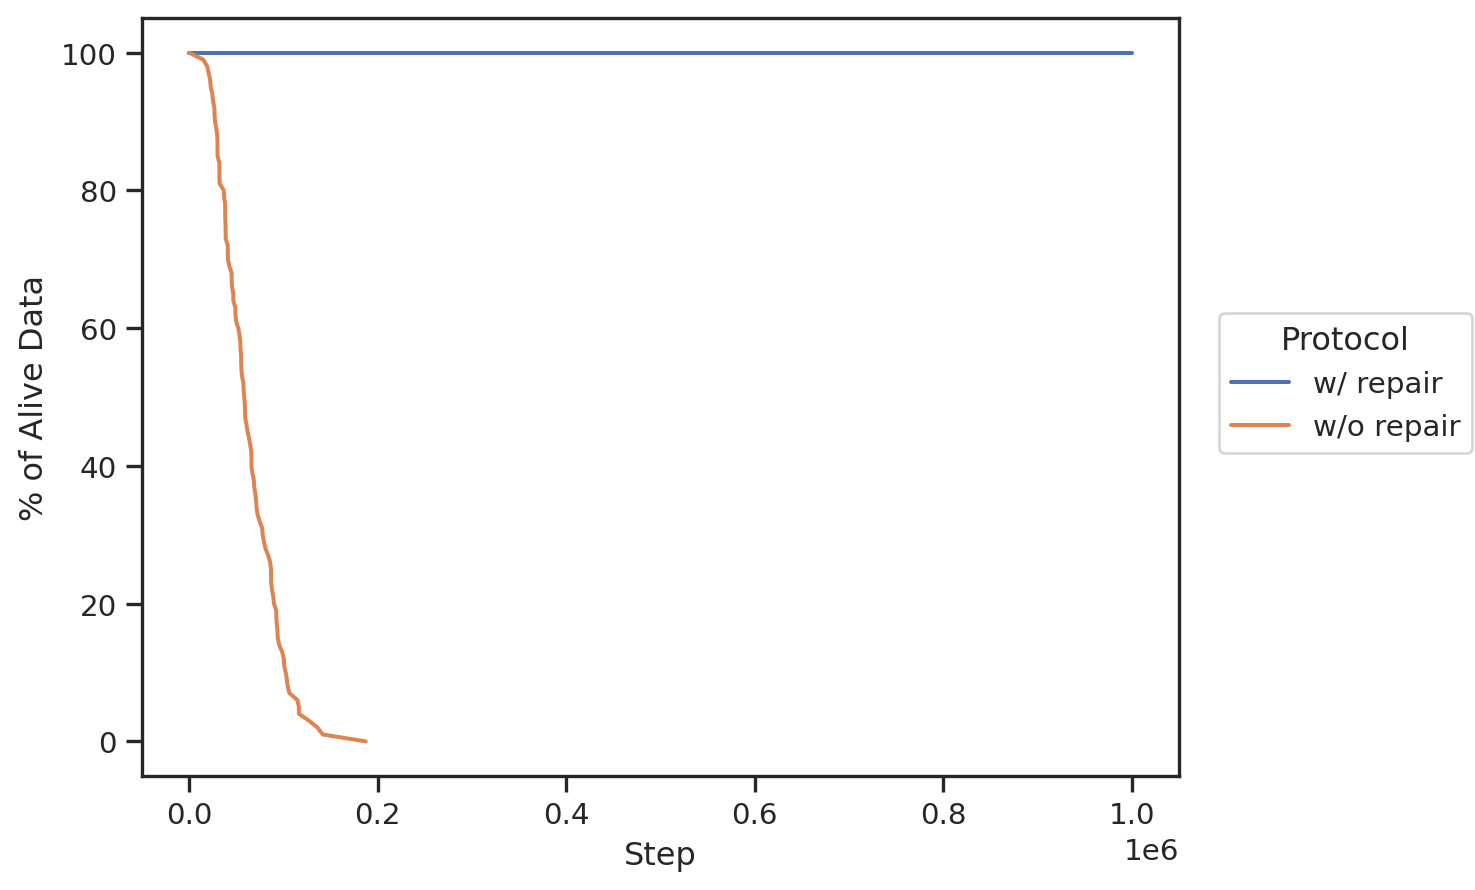

In [155]:
p = (
    so.Plot(
        data=df[df["Average Size of Failure Domains"] == 0], 
        x="Step", y="% of Alive Data", color="Protocol")
    .theme({**axes_style("ticks")})
    .add(so.Line())
    # .scale(color=so.Continuous().tick(at=[x / 5 for x in range(8, 12)]))
)
p

In [156]:
if SAVE:
    p.save('repair.pdf', bbox_inches='tight')